In [1]:
pip install scikit-learn matplotlib

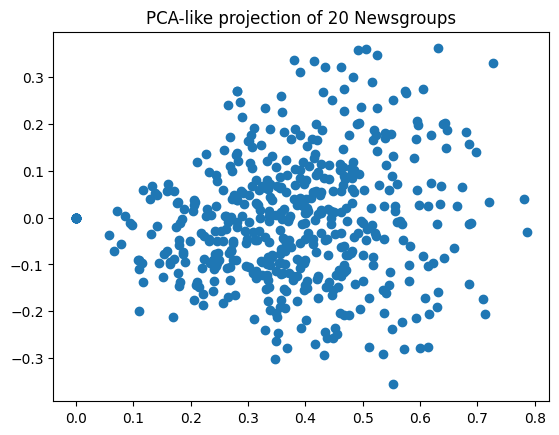

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


newsgroups_train = fetch_20newsgroups(
    subset='train',
    categories=['alt.atheism', 'sci.space'],
    remove=('headers', 'footers', 'quotes')
)
newsgroups_train.data = newsgroups_train.data[:500]

pipeline = Pipeline([
    ('vect', CountVectorizer(max_features=1000)),
    ('tfidf', TfidfTransformer()),
])

X = pipeline.fit_transform(newsgroups_train.data)

svd = TruncatedSVD(n_components=2).fit(X)
data2D = svd.transform(X)

plt.scatter(data2D[:, 0], data2D[:, 1])
plt.title("PCA-like projection of 20 Newsgroups")
plt.show()
